In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_axis = np.arange(0, 10, 0.01)

In [3]:
sigma_square = 100
sigma = math.sqrt(sigma_square)

In [4]:
left = np.true_divide(1, np.multiply(x_axis, sigma * math.sqrt(2 * math.pi)), where=x_axis != 0)
left[0] = 0
left

array([0.        , 3.9894228 , 1.9947114 , 1.3298076 , 0.9973557 ,
       0.79788456, 0.6649038 , 0.56991754, 0.49867785, 0.4432692 ,
       0.39894228, 0.3626748 , 0.3324519 , 0.30687868, 0.28495877,
       0.26596152, 0.24933893, 0.23467193, 0.2216346 , 0.20996962,
       0.19947114, 0.18997251, 0.1813374 , 0.17345317, 0.16622595,
       0.15957691, 0.15343934, 0.1477564 , 0.14247939, 0.1375663 ,
       0.13298076, 0.12869106, 0.12466946, 0.1208916 , 0.11733596,
       0.11398351, 0.1108173 , 0.10782224, 0.10498481, 0.10229289,
       0.09973557, 0.097303  , 0.09498626, 0.09277727, 0.0906687 ,
       0.08865384, 0.08672658, 0.08488134, 0.08311298, 0.08141679,
       0.07978846, 0.07822398, 0.07671967, 0.07527213, 0.0738782 ,
       0.07253496, 0.07123969, 0.06998987, 0.06878315, 0.06761734,
       0.06649038, 0.06540037, 0.06434553, 0.06332417, 0.06233473,
       0.06137574, 0.0604458 , 0.05954362, 0.05866798, 0.05781772,
       0.05699175, 0.05618905, 0.05540865, 0.05464963, 0.05391

In [5]:
right = np.add(np.log(x_axis, where=x_axis != 0), 0.03)
right = np.exp(np.true_divide(-np.square(right), 2 * sigma_square))
right[0] = 0
right

array([0.        , 0.90062986, 0.92741836, 0.94135752, 0.95042631,
       0.95697516, 0.9620038 , 0.96602551, 0.96933665, 0.97212282,
       0.97450735, 0.97657607, 0.97839089, 0.97999781, 0.98143189,
       0.98272035, 0.98388476, 0.98494245, 0.98590751, 0.98679159,
       0.98760435, 0.98835393, 0.98904725, 0.98969018, 0.9902878 ,
       0.9908445 , 0.99136409, 0.99184992, 0.99230494, 0.99273174,
       0.99313263, 0.99350966, 0.99386468, 0.99419932, 0.99451509,
       0.99481331, 0.99509521, 0.99536188, 0.99561433, 0.99585347,
       0.99608015, 0.99629512, 0.99649911, 0.99669274, 0.99687664,
       0.99705134, 0.99721735, 0.99737516, 0.9975252 , 0.99766789,
       0.99780359, 0.99793268, 0.99805547, 0.99817228, 0.9982834 ,
       0.9983891 , 0.99848964, 0.99858525, 0.99867616, 0.99876257,
       0.9988447 , 0.99892273, 0.99899682, 0.99906716, 0.9991339 ,
       0.99919719, 0.99925717, 0.99931397, 0.99936772, 0.99941855,
       0.99946656, 0.99951187, 0.99955458, 0.99959478, 0.99963

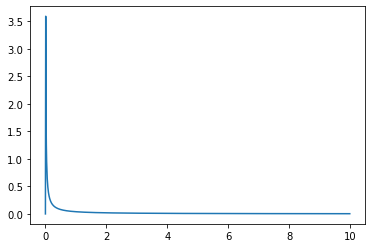

In [7]:
pdf = np.multiply(left, right)
plt.plot(x_axis, pdf)

In [10]:
np.argmax(pdf)

1

In [34]:
def log_gaus(x, mu, sigma):
    if x == 0:
        return 0
    return 1 / x * sigma * math.sqrt(2 * math.pi) * math.exp(- ((math.log(x) - mu) ** 2 / (2 * sigma ** 2)))

y_axis = [log_gaus(x, 0.2, 1) for x in x_axis]


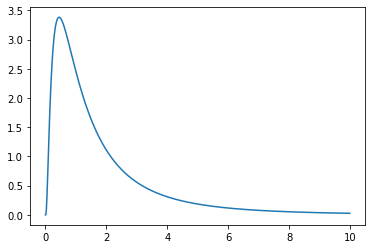

In [35]:
plt.plot(x_axis, y_axis)

In [36]:
x_axis[np.argmax(y_axis)]

0.45

In [37]:
math.exp(0.2 + 1 ** 2 / 2)

2.0137527074704766

In [60]:
def log_gaus_2(x, d, sigma):
    if x == 0:
        return 0
    mu = math.log(d) + sigma ** 2
    return 1 / x * sigma * math.sqrt(2 * math.pi) * math.exp(- ((math.log(x) - mu) ** 2 / (2 * sigma ** 2)))

y_axis = [log_gaus_2(x, 1, 1/4) for x in x_axis]

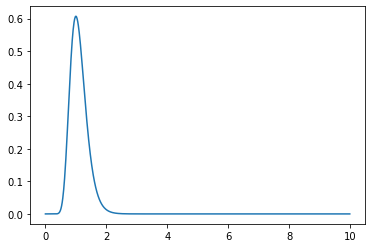

In [61]:
plt.plot(x_axis, y_axis)

In [62]:
x_axis[np.argmax(y_axis)]

1.0

# numpy implementations

In [ ]:
def compute_f_i_given_d(f_source, f_i_j_given_d, cur_pos, axis_length):
    # avoid overflow
    left = max(0, cur_pos - 200)  # CHANGED
    right = min(cur_pos + 200, axis_length)  # CHANGED
    f_i_given_d = np.zeros(axis_length)
    f_source_w = f_source[left:right]
    f_i_j_given_d_w = f_i_j_given_d[:right - left]
    f_i_given_d_w = np.convolve(f_source_w, f_i_j_given_d_w)
    f_i_given_d_w = f_i_given_d_w[:right - left]  # slice to window size
    f_i_given_d[left:right] = f_i_given_d_w
    f_i_given_d = NEW.normalize(f_i_given_d)
    return f_i_given_d